# Analysis for P170+20 galaxy
This galaxy is a candidate for high-redshift lensed quasar. We analyze this galaxy using optical and near infrared data. 
Data is not available for public.
This python script is created to analyze and merge two different sets of data, FLAMINGOS2  (near infrared) and GMOS (optical) data from GEMINI telescopes.
This is only one part before choosing the final data we used in our analysis. Several studies weere perform in this galaxy, including a second notebook (P170+20_P2) and photometric studies.

In [2]:
#Import libraries
import numpy as np
import matplotlib.pyplot  as plt
import os
#Astronomical libraries
import astropy
from astropy.io import fits
from photutils.aperture import aperture_photometry
from photutils.aperture import CircularAnnulus, CircularAperture, SkyCircularAperture, SkyCircularAnnulus 
from photutils.aperture import ApertureStats
from astropy.visualization import simple_norm
from astropy.wcs import WCS
from astropy.coordinates import SkyCoord
from astropy import units as u

#Import tool sculptor designed for galaxies. Code and documentation --> https://sculptor.readthedocs.io/en/latest/index.html
from sculptor import speconed as sod
from astropy import units as u

In [2]:
# Import the speconed module from sculptor
#This needs to be run for an specific previously intalled environment
from sculptor import speconed as sod
# Instantiate an empty SpecOneD object
spec = sod.SpecOneD()

In [3]:
#Open file/Open F2 data 
hdu= fits.open('spec1d_P170p20_coadd_tellcorr.fits')
#Astronomical data comes with headers with important information for analysis
hdr = hdu[0].header

In [4]:
#Open second dataset/GMOS data
dataf=hdu[1].data
wavef=np.array(dataf['wave'],dtype='float')
fluxf=np.array(dataf['flux'],dtype='float')
hdu_g= fits.open('spec1d_N20220613S0020-N20220613S0025-PSO170p20.fits') #new data
hdr_g = hdu_g[0].header
print(hdu_g[1].data.columns)


ColDefs(
    name = 'TRACE_SPAT'; format = '1D'
    name = 'FWHMFIT'; format = '1D'
    name = 'OPT_WAVE'; format = '1D'
    name = 'OPT_FLAM'; format = '1D'
    name = 'OPT_FLAM_SIG'; format = '1D'
    name = 'OPT_FLAM_IVAR'; format = '1D'
    name = 'OPT_COUNTS'; format = '1D'
    name = 'OPT_COUNTS_IVAR'; format = '1D'
    name = 'OPT_COUNTS_SIG'; format = '1D'
    name = 'OPT_MASK'; format = '1L'
    name = 'OPT_COUNTS_SKY'; format = '1D'
    name = 'OPT_FRAC_USE'; format = '1D'
    name = 'OPT_CHI2'; format = '1D'
    name = 'BOX_NPIX'; format = '1D'
    name = 'BOX_WAVE'; format = '1D'
    name = 'BOX_FLAM'; format = '1D'
    name = 'BOX_FLAM_SIG'; format = '1D'
    name = 'BOX_FLAM_IVAR'; format = '1D'
    name = 'BOX_COUNTS'; format = '1D'
    name = 'BOX_COUNTS_IVAR'; format = '1D'
    name = 'BOX_COUNTS_SIG'; format = '1D'
    name = 'BOX_MASK'; format = '1L'
    name = 'BOX_COUNTS_SKY'; format = '1D'
    name = 'trace_spec'; format = '1K'
)


Filename: spec1d_N20220613S0020-N20220613S0025-PSO170p20.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      45   ()      
  1  SPAT0543-SLIT0358-MSC01    1 BinTableHDU     88   3422R x 24C   ['1D', '1D', '1D', '1D', '1D', '1D', '1D', '1D', '1D', '1L', '1D', '1D', '1D', '1D', '1D', '1D', '1D', '1D', '1D', '1D', '1D', '1L', '1D', '1K']   
  2  MSC01-DETECTOR    1 BinTableHDU     61   3R x 17C   [K, K, L, L, D, D, D, D, D, K, 4D, 4D, K, 3A, 2D, D, 9D]   


(0.0, 6.0)

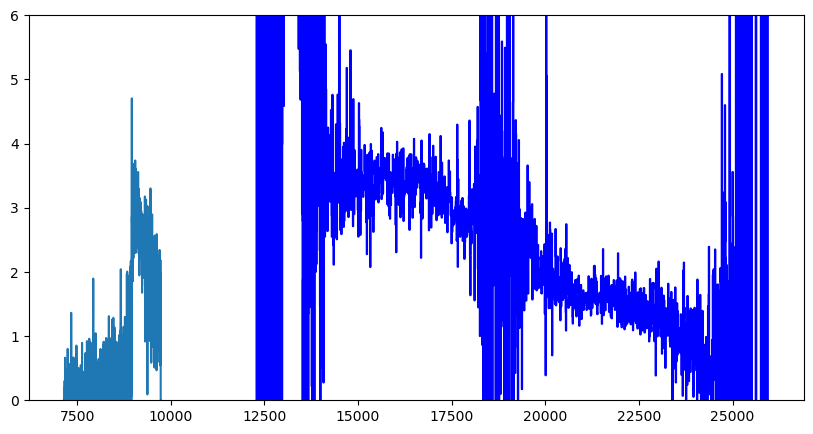

In [5]:
#Plot both datasets. Shows the raw data, 1D spectrum in both bands. Left (GMOS optical) Right (F2 NIR)
plt.figure(figsize=(10,5))
plt.step(wavef,fluxf,color='blue')
#plt.xlim(1500,30000)
#plt.ylim(-0.1,50.0)
hdu_g.info()
#print(hdu_g[1].data.columns)
datag=hdu_g[1].data
waveg=datag['OPT_WAVE']
fluxg=datag['OPT_FLAM']
errorg=datag['OPT_FLAM_IVAR']
plt.step(waveg,fluxg)
#plt.xlim(8000,9800)
plt.ylim(0,6)

3422 3422


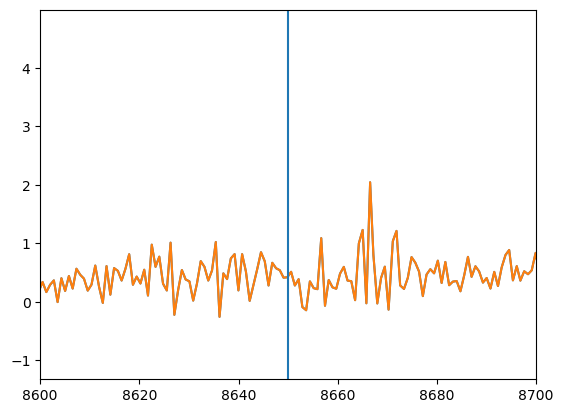

In [6]:
#Cleaning data/removing problematic points
point= ~np.isclose(waveg, 8650, atol=0) #waveg!=8650 # ~np.isclose(waveg, 8650, atol=0.10) 
gmosdatafluxnew=fluxg[point]
gmosdataerrnew=errorg[point]
gmosdatawavenew=waveg[point]
tabnew = astropy.table.Table()
tabnew['WAVE']= gmosdatawavenew
tabnew['FLUX']= gmosdatafluxnew
tabnew['ERR']= gmosdataerrnew
tabnew.write('GMOSnew.fits', overwrite=True)
print(len(fluxg),len(gmosdatafluxnew))
#fluxg[waveg==8650]
#gmosdatafluxnew[gmosdatawavenew==8650]
plt.plot(waveg,fluxg)
plt.plot( gmosdatawavenew,gmosdatafluxnew)
plt.xlim(8600,8700)
plt.axvline(8650)

We build spectrum objects over SCULPTOR to analyze them.

ColDefs(
    name = 'wave'; format = '1D'
    name = 'wave_grid_mid'; format = '1D'
    name = 'flux'; format = '1D'
    name = 'ivar'; format = '1D'
    name = 'mask'; format = '1K'
    name = 'telluric'; format = '1D'
    name = 'obj_model'; format = '1D'
)
[12289.64818866 12292.34260724 17321.99598799     0.
     0.             0.             0.        ]
<class 'astropy.io.fits.fitsrec.FITS_record'>


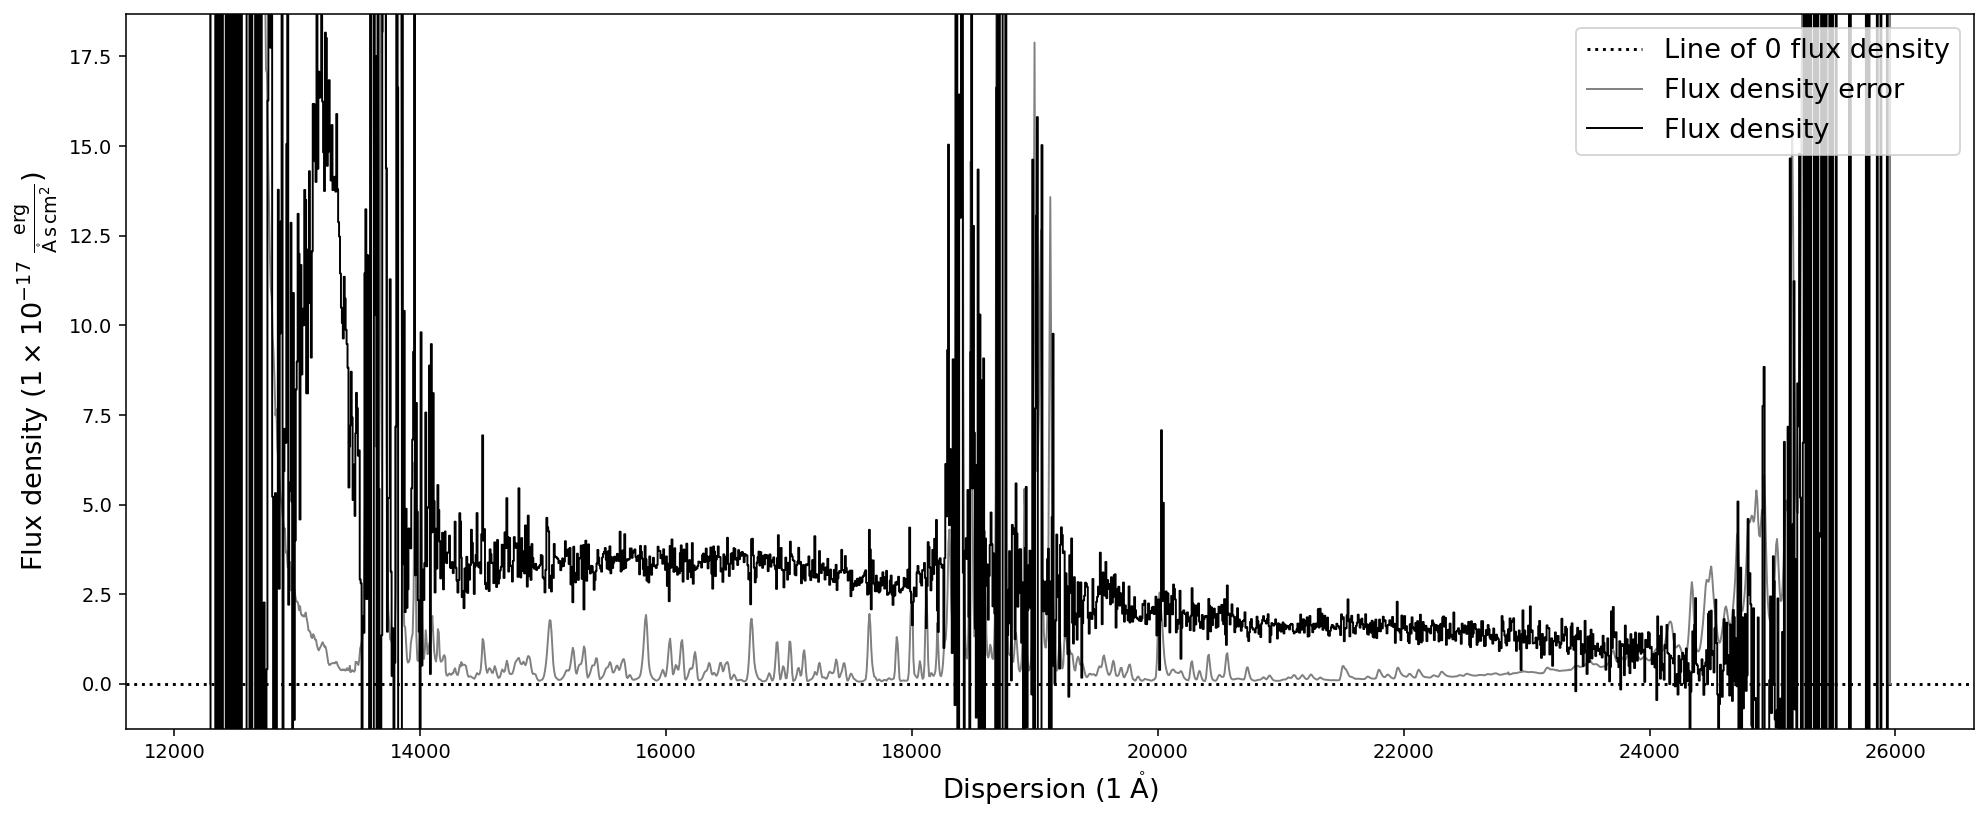

In [9]:
from astropy.io import fits
import astropy.units as units
# Define the name of the example spectrum
spec_filename = '/users/aurora.mata/Documents/PJ170+20/spec1d_P170p20_coadd_tellcorr.fits'

# Read in the example spectrum with astropyspec1d_P170p20_coadd_tellcorr.fits
hdu = fits.open(spec_filename)

# Extract the dispersion axis, the flux density and the error from the fits file
print(hdu[1].columns)
#mask=np.where()
dispersion = hdu[1].data[0]  ## * u.Ang
#dispersion=dispersion[mask]
flux_density = hdu[1].data[2]  ## * u.erg/u.s/u.cm/u.cm/u.Ang
flux_density_ivar = hdu[1].data[3] ## * u.erg/u.s/u.cm/u.cm/u.Ang


print(np.array(dispersion))
print(type(dispersion))

# Extract the fits header of the spectrum
header = hdu[0].header

# Before we initialize the SpecOneD object we need to convert the dispersion axis to a linear scale
#dispersion = 10.**dispersion

# The header provides information on the units of the spectrum (Let's print it out below!)
# print('Wavelength unit: {}'.format(header['WAT1_001']))
# print('Flux density unit: {}'.format(header['BUNIT']))

dispersion_unit = 1.*units.AA
fluxden_unit = 1e-17 * units.erg/units.s/units.cm**2/units.AA

tab = astropy.table.Table(hdu[1].data)


# Now we can initialize a SpecOneD object manually
## spec = sod.SpecOneD(dispersion=np.array(dispersion), fluxden=np.array(flux_density), fluxden_ivar=1/np.array(flux_density_ivar)**2.,
##                    fluxden_unit=fluxden_unit, dispersion_unit=dispersion_unit, header=header)

import numpy.ma as ma

arr = tab["ivar"]
masked_arr = ma.masked_equal(arr, 0)

spec = sod.SpecOneD(dispersion=tab["wave"].data, fluxden=tab["flux"].data, fluxden_ivar=tab["ivar"].data,
                   fluxden_unit=fluxden_unit, dispersion_unit=dispersion_unit, header=header)

spec.plot()

ColDefs(
    name = 'WAVE'; format = 'D'
    name = 'FLUX'; format = 'D'
    name = 'ERR'; format = 'D'
)


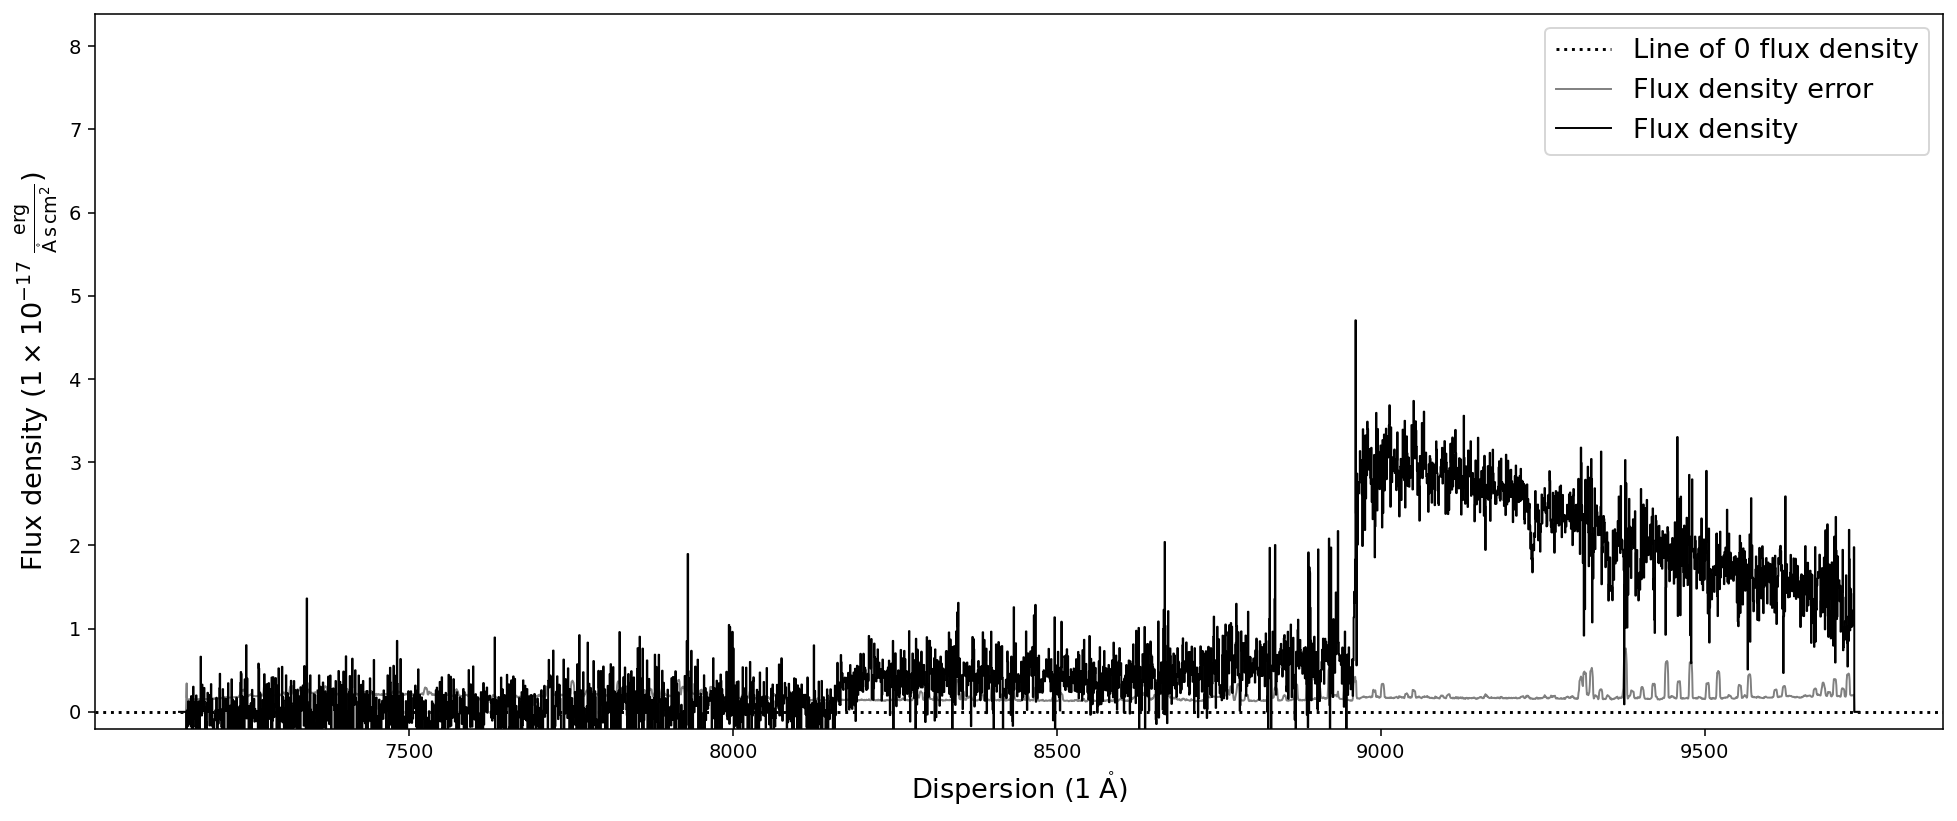

20.350169231051275


In [10]:
#Here we convert our data to an spectrum using SCULPTOR. 
# Define the name of the example spectrum
spec_filename2 = '/users/aurora.mata/Downloads/GMOSnew.fits' #PSO170p20_coadd.fits'#

# Read in the example spectrum with astropy
hdu = fits.open(spec_filename2)

# Extract the dispersion axis, the flux density and the error from the fits file
print(hdu[1].columns)
#mask=np.where()
dispersion = hdu[1].data[0]  ## * u.Ang
#dispersion=dispersion[mask]
flux_density = hdu[1].data[1]  ## * u.erg/u.s/u.cm/u.cm/u.Ang
flux_density_ivar = hdu[1].data[2] ## * u.erg/u.s/u.cm/u.cm/u.Ang


#print(np.array(dispersion))
#print(type(dispersion))

# Extract the fits header of the spectrum
header = hdu[0].header

# Before we initialize the SpecOneD object we need to convert the dispersion axis to a linear scale
#dispersion = 10.**dispersion

# The header provides information on the units of the spectrum (Let's print it out below!)
# print('Wavelength unit: {}'.format(header['WAT1_001']))
# print('Flux density unit: {}'.format(header['BUNIT']))

dispersion_unit = 1.*units.AA

fluxden_unit = 1e-17 * units.erg/units.s/units.cm**2/units.AA

tab2 = astropy.table.Table(hdu[1].data)


# Now we can initialize a SpecOneD object manually
## spec = sod.SpecOneD(dispersion=np.array(dispersion), fluxden=np.array(flux_density), fluxden_ivar=1/np.array(flux_density_ivar)**2.,
##                    fluxden_unit=fluxden_unit, dispersion_unit=dispersion_unit, header=header)
arr = tab["ivar"]
masked_arr = ma.masked_equal(arr, 0)

spec2 = sod.SpecOneD(dispersion=tab2["WAVE"].data, fluxden=tab2["FLUX"].data, fluxden_ivar=tab2['ERR'].data,
                   fluxden_unit=fluxden_unit, dispersion_unit=dispersion_unit, header=header)
#spec2 = sod.SpecOneD(dispersion=tab2["wave"].data, fluxden=tab2["flux"].data, fluxden_ivar=tab2["ivar"].data,
 #                  fluxden_unit=fluxden_unit, dispersion_unit=dispersion_unit, header=header)
spec2.plot()
pb = sod.PassBand('PS1-z')
print(spec2.calculate_passband_ab_magnitude(pb, force=False, match_method='interpolate'))

# Resample data. 
The smallest pixel size will be used to create bins of the same size over all of our data (F2 and GMOS)

In [11]:
#Here we check pixel size.
#GMOS pixel size
pixel=spec2.dispersion-np.roll(spec2.dispersion,-1)
print(pixel[10:100])

[-0.75827947 -0.75827947 -0.75827947 -0.75827947 -1.09570622 -0.18093134
 -0.96706546 -0.69601421 -0.76185103 -0.79619163 -0.76998736 -0.72951387
 -0.7932441  -0.78488174 -0.76118807 -0.76303101 -0.75639688 -0.78242319
 -0.763943   -0.76009781 -0.75962146 -0.77750109 -0.77307319 -0.75796329
 -0.76425785 -0.77053515 -0.77824675 -0.76865883 -0.74417948 -0.77413388
 -0.78071882 -0.74211523 -0.76260602 -0.75378892 -0.77479659 -0.77915802
 -0.75420116 -0.75561023 -0.77353368 -0.77096086 -0.75478513 -0.75443872
 -0.76937055 -0.77102414 -0.74569615 -0.76254162 -0.76685057 -0.76512362
 -0.75348239 -0.76922758 -0.74895901 -0.76615058 -0.7511743  -0.7573189
 -0.75442365 -0.76707929 -0.75170153 -0.75458023 -0.75462918 -0.76208774
 -0.75495139 -0.75455901 -0.75842682 -0.75455792 -0.75414284 -0.75535307
 -0.75521898 -0.75387832 -0.7561561  -0.75416352 -0.75631803 -0.75673462
 -0.75242401 -0.75377305 -0.75614024 -0.75289058 -0.75292418 -0.75590263
 -0.75631778 -0.75508501 -0.75471948 -0.75510941 -0.

In [12]:
#FLAMINGOS pixel size
pixel=spec.dispersion-np.roll(spec.dispersion,-1)
print(np.mean(pixel[10:100]))


-7.526435372296995


In [13]:
spec2.dispersion[0:-1]


array([7144.46718508, 7145.22546455, 7145.98374403, ..., 9736.07114588,
       9736.83448593, 9737.59252   ], shape=(3421,), dtype='>f8')

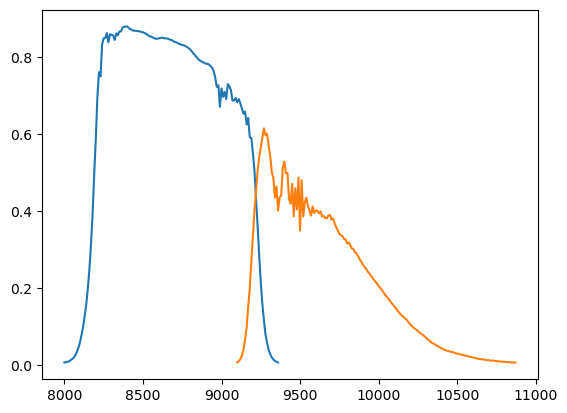

In [14]:
#Here we check the photometric bands available in SCULPTOR
pb_z = sod.PassBand(passband_name='PS1-z')
plt.plot(pb_z.dispersion, pb_z.fluxden)
pb_y = sod.PassBand(passband_name='PS1-y')
plt.plot(pb_y.dispersion, pb_y.fluxden)


1813
3422


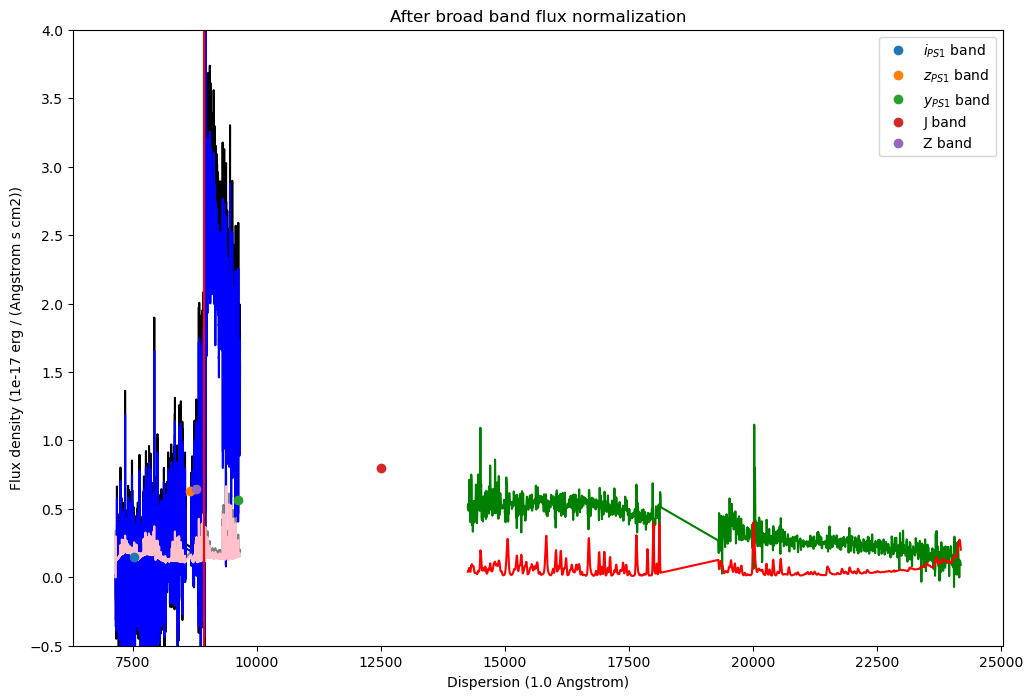

In [16]:
## ORIGINAL
#The photometric points z_ab and H_band are used to re-scale our data to actual measures of the emission of the galaxy detected with other intruments.
#Absolute flux 
#In addition, we select the data we want to consider for our analysis, based on the noise of our data. For this we used mask mask_opt and mask,
#for our optical data (GMOS) and near infrared data (F2) respectively.

z_ab = 20.5
pb_r = sod.PassBand('PS1-z')

## Spec is flamingos(F2)
## Spec2 is GMOS

#Flamingos
mask= ((spec.dispersion > 14250) & (spec.dispersion < 18150)) | \
       ((spec.dispersion > 19300) & (spec.dispersion < 24200))
#print(len(mask))
print(len(spec.fluxden))

#GMOS
nspecoptA = spec2.renormalize_by_ab_magnitude(z_ab, pb_r)


#Flamingos
#Absolute flux
H_band=19.70
pb_H = sod.PassBand(passband_name='2MASS-H')
nspecoptB=spec.renormalize_by_ab_magnitude(H_band,pb_H)


print(len(nspecoptA.fluxden))
mask_opt= (
    (
        ((nspecoptA.dispersion > 6000) & (nspecoptA.dispersion < 8564)) | #8564
        ((nspecoptA.dispersion > 8673) & (nspecoptA.dispersion < 9660)) #9660
    ) 
)


#Plot data
plt.figure(figsize=(12, 8))
plt.plot(nspecoptB.dispersion[mask], nspecoptB.fluxden[mask], 'green')
plt.plot(nspecoptB.dispersion[mask], nspecoptB.fluxden_err[mask], 'red')


plt.plot(spec2.dispersion[mask_opt], spec2.fluxden[mask_opt], 'black')
plt.plot(spec2.dispersion[mask_opt],spec2.fluxden_err[mask_opt], 'grey')


plt.plot(nspecoptA.dispersion[mask_opt], nspecoptA.fluxden[mask_opt], 'blue')
plt.plot(nspecoptA.dispersion[mask_opt],nspecoptA.fluxden_err[mask_opt], 'pink')
#plt.xlim(7000,10000)
plt.ylim(-3,8)
plt.xlabel('Dispersion ({})'.format(spec2.dispersion_unit))
plt.ylabel('Flux density ({})'.format(spec2.fluxden_unit))
plt.title('After broad band flux normalization')

#Plot photometric points to check consistency

plt.plot(7520, 1.46e-1, 'o',label=r'$i_{PS1}$ band')
plt.plot(8660, 6.31e-1, 'o',label=r'$z_{PS1}$ band')
plt.plot(9620, 5.67e-1, 'o',label=r'$y_{PS1}$ band')
plt.plot(12500, 8.014e-1, 'o',label='J band')
plt.plot(8780, 6.47e-1, 'o',label='Z band')
plt.legend()




#Define again with filter to use in Sculptor
# OPT
#nspecoptA=sod.SpecOneD(dispersion=nspecoptA.dispersion[mask_opt], fluxden=new_spec_fluxcon.data, fluxden_ivar=new_spec_fluxcon_err.data,
 #                  fluxden_unit=fluxden_unit, dispersion_unit=dispersion_unit, header=header)
nspecoptA=sod.SpecOneD(dispersion=nspecoptA.dispersion[mask_opt], fluxden=nspecoptA.fluxden[mask_opt], fluxden_ivar=nspecoptA.fluxden_err[mask_opt],
                   fluxden_unit=fluxden_unit, dispersion_unit=dispersion_unit, header=header)
# NIR
#nspecoptB=sod.SpecOneD(dispersion=spec.dispersion[mask], fluxden=new_spec_fluxcon2.data, fluxden_ivar=new_spec_fluxcon_err2.data,
 #                  fluxden_unit=fluxden_unit, dispersion_unit=dispersion_unit, header=header) 
nspecoptB=sod.SpecOneD(dispersion=nspecoptB.dispersion[mask], fluxden=nspecoptB.fluxden[mask], fluxden_ivar=nspecoptB.fluxden_err[mask],
                   fluxden_unit=fluxden_unit, dispersion_unit=dispersion_unit, header=header) 

#plt.axvline(12300)
#plt.axvline(14100)
#plt.axvline(18300)
#plt.axvline(19100)
#plt.axvline(8959)
#plt.axvline(8963.5)
#plt.axvline(8673)
#remove lines
#plt.xlim(8600,8700)
#plt.xlim(8900,9800)#8980
plt.ylim(-0.5,4)
plt.axvline(8924,color='red')

In [17]:
#We check some factors of the rescale data
nspecoptA = spec2.renormalize_by_ab_magnitude(z_ab, pb_r)
np.nanmean(nspecoptA.fluxden/spec2.fluxden)

/var/folders/j7/7jycj8cn5115qrnj1rx7c8340005dg/T/ipykernel_24469/3232286390.py:2: RuntimeWarning: invalid value encountered in divide
  np.nanmean(nspecoptA.fluxden/spec2.fluxden)


np.float64(0.8710993555047282)

In [18]:
np.sum(~np.isnan(nspecoptA.fluxden))

np.int64(3422)

-0.9054207975021231 4.098698945230976


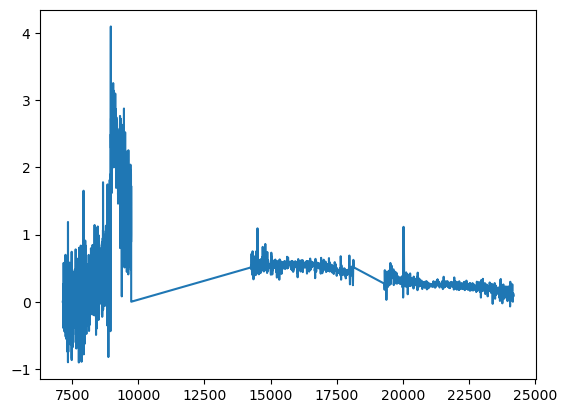

In [19]:
tabs = astropy.table.Table()
tabs['WAVELENGTH']= np.append(nspecoptA.dispersion, nspecoptB.dispersion)
tabs['FLUX']= np.append(nspecoptA.fluxden, nspecoptB.fluxden)
tabs['ERR']= np.append(nspecoptA.fluxden_err,nspecoptB.fluxden_err) 
plt.plot(tabs['WAVELENGTH'],tabs['FLUX'])
#plt.ylim(0,6e-17)

print(np.min(tabs['FLUX']), np.max(tabs['FLUX']))


# No need to do PL fit


In this part we perform a power law or PL fit, this was not used in the final analysis of the object since re-scale data with photometric point is enough. At the beggining we proceed with this PL fit since we obtain the H band point afterwards. 

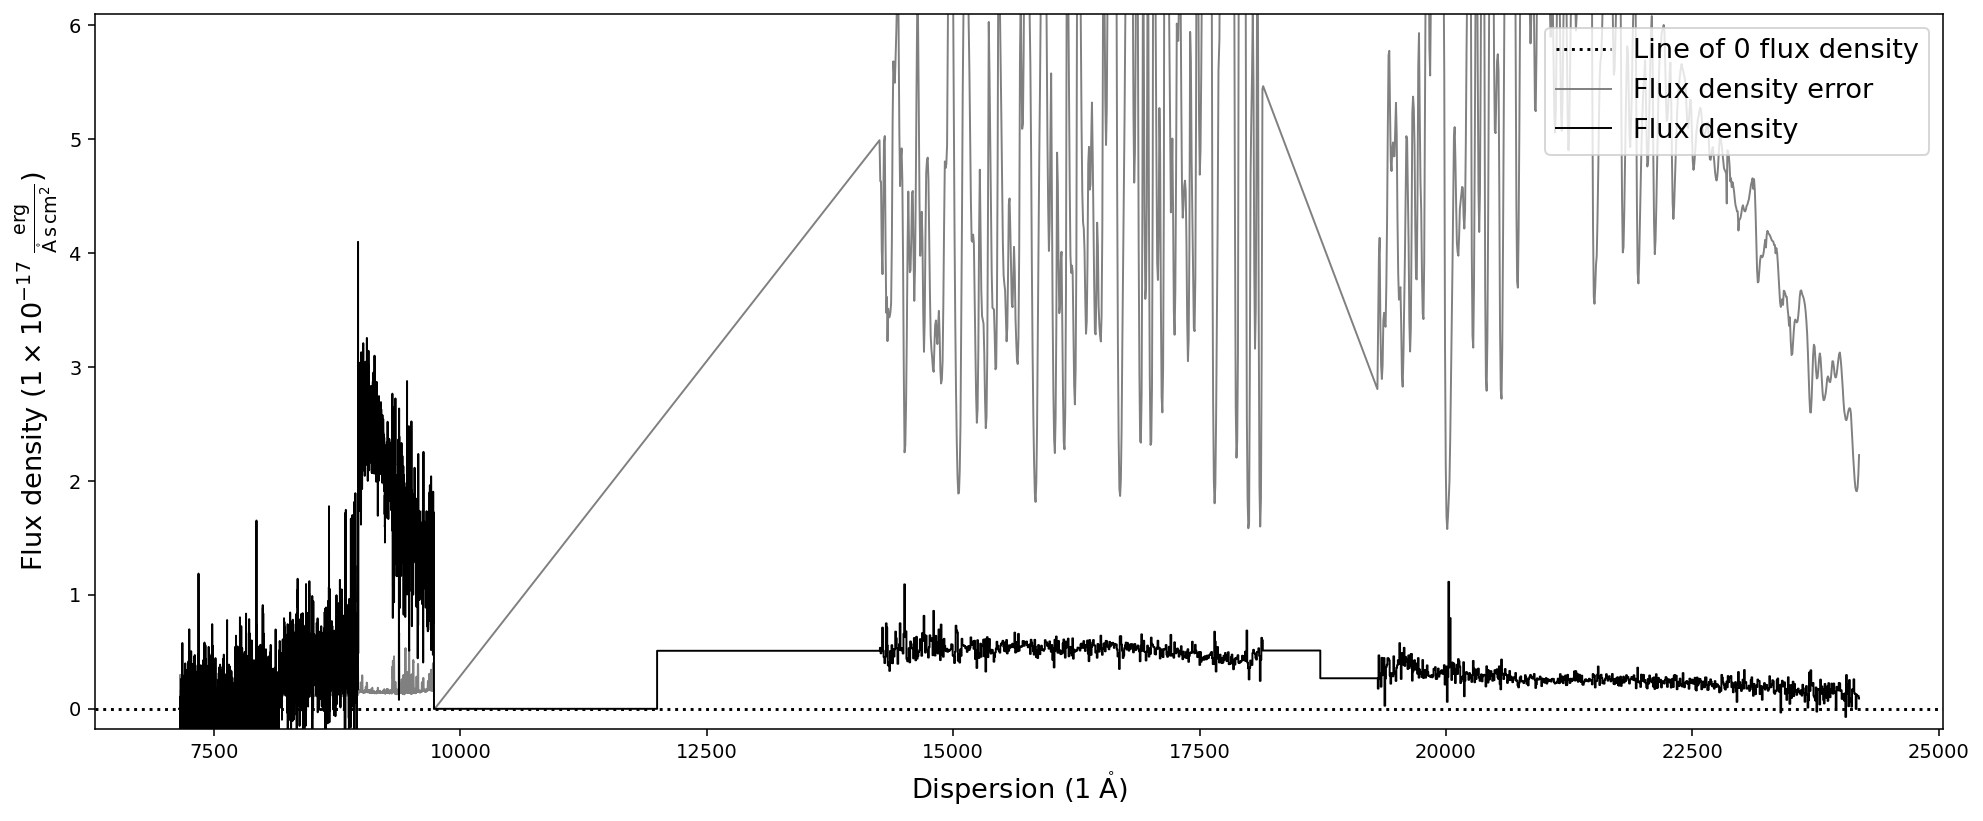

In [20]:
# Building the dispersion array
#comp_dispersion = nspecoptA.dispersion
#comp_dispersion = np.append(comp_dispersion, nspecoptB.dispersion)
# Building the flux density array
#comp_fluxden = nspecoptA.fluxden
#comp_fluxden = np.append(comp_fluxden, nspecoptB.fluxden/6)
# Building the flux density error array
#comp_fluxden_err = 1/nspecoptA.fluxden_err
#comp_fluxden_err = np.append(comp_fluxden_err, 1/nspecoptB.fluxden_err*6)


dispersion_unit = 1.*units.AA
fluxden_unit = 1e-17 * units.erg/units.s/units.cm**2/units.AA
bool_nan = np.isnan(tabs["FLUX"].data) == False

trimmed_array = np.trim_zeros(tabs["FLUX"].data) #eliminate zeros
trimmed_array_err=np.trim_zeros(tabs["ERR"].data)

# Initialize a new SpecOneD object for the composite
composite = sod.SpecOneD(dispersion=tabs['WAVELENGTH'].data[bool_nan],
                        fluxden=tabs['FLUX'].data[bool_nan],
                        fluxden_err=(tabs['ERR'].data[bool_nan]),
                         # We now need to specify the physical units
                         # of the dispersion and flux density axis.
                         # Here, we simply copy them from the near-infrared
                         # spectrum.
                        dispersion_unit=dispersion_unit,
                        fluxden_unit=fluxden_unit)




# Let's plot our new composite spectrum
composite.plot(show_fluxden_err=True)

[INFO] Import "sculptor_extensions" package: qso copy
[WARNING] FeII iron template of Vestergaard & Wilkes 2001 NOT found. If you want to use the pre-defined iron models, please contact Marianne Vestergaard at mvester@nbi.ku.dk and add the Fe_UVtemplt_A.asc file to the sculptor/data/iron_templates folder.
[INFO] FeII iron template of Tsuzuki et al. 2006 found. If you will be using these templates in your model fit and publication, please add the citation to the original work, ADS bibcode: 2006ApJ...650...57T
[INFO] FeII iron template of Boroson & Green 1992 found. If you will be using these templates in your model fit and publication, please add the citation to the original work, ADS bibcode: 1992ApJS...80..109B
[INFO] Import "sculptor_extensions" package: my_extension
[INFO] Import "sculptor_extensions" package: qso
[WARNING] FeII iron template of Vestergaard & Wilkes 2001 NOT found. If you want to use the pre-defined iron models, please contact Marianne Vestergaard at mvester@nbi.ku.

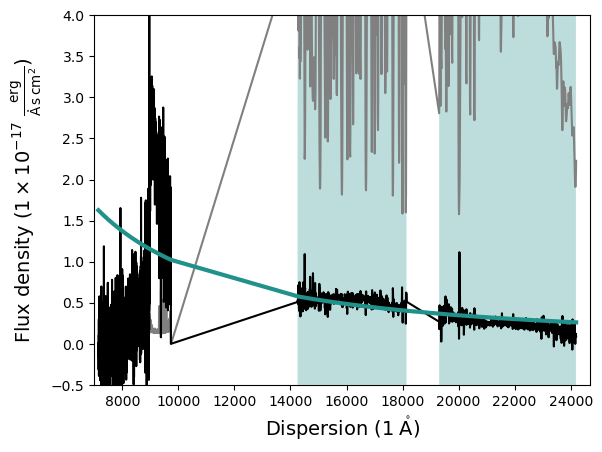

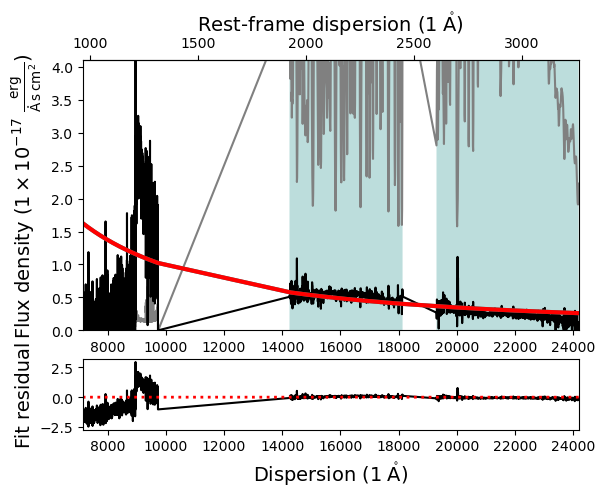

In [21]:
from sculptor import specfit as scfit
from sculptor import specmodel as scmod
import pkg_resources
redshift = 6.41


# Plot the quasar spectrum for confirmation that everything worked well.
fit = scfit.SpecFit(composite, redshift)

# Add the continuum SpecModel
fit.add_specmodel()
# We access the initialized SpecModel object by using the first item in the SpecFit.specmodels list
contmodel = fit.specmodels[0]
# Let us rename this SpecModel 'Continuum'
contmodel.name = 'Continuum'

# Define the model function name
model_name = 'Power Law (2500A)'#'Power Law (2500A)' Power Law (2500A) + BC
# Define the model prefix
# It is important to keep track of the prefix to later access this model in the analysis
model_prefix = 'PL_'
# Add the model function to the SpecModel
contmodel.add_model(model_name, model_prefix)
params = contmodel.params_list[0]
params['PL_slope'].vary = False
#('PL_slope', value=-1.5, vary=False)
#'PL_slope', value=-1.5, vary=False

#contmodel.add_wavelength_range_to_fit_mask(9570, 9900)
contmodel.add_wavelength_range_to_fit_mask(14000, 18300)
contmodel.add_wavelength_range_to_fit_mask(19000, 24700)
# Fit the continuum model
contmodel.fit()
# Plot the fitted continuum model and the spectrum
contmodel.plot(xlim=[7000, 24700], ylim=[-0.5, 4])
#contmodel.ylim([0,6])

# Plot the SpecFit fit with all SpecModels (We only have 1 at the moment)
fit.plot()



In [22]:
#Here we can check the results of the fit. The values for slope, amplitude and redshift.
fit.save('example_fit_cont')
contmodel.fit_result

[INFO] Removing old model file: example_fit_cont/0_PL__model.json
[INFO] Saving SpecModel fit result
[INFO] Saving new model file: example_fit_cont/0_PL__model.json


/Users/aurora.mata/sculptor/sculptor/speconed.py:405: FutureWarning: Starting with pandas version 3.0 all arguments of to_hdf except for the argument 'path_or_buf' will be keyword-only.
  df.to_hdf(filename, 'data')
/Users/aurora.mata/sculptor/sculptor/speconed.py:414: FutureWarning: Starting with pandas version 3.0 all arguments of to_hdf except for the argument 'path_or_buf' will be keyword-only.
  df.to_hdf(filename, 'spec_meta')
/Users/aurora.mata/sculptor/sculptor/speconed.py:418: FutureWarning: Starting with pandas version 3.0 all arguments of to_hdf except for the argument 'path_or_buf' will be keyword-only.
  self.header.to_hdf(filename, 'header')
/Users/aurora.mata/sculptor/sculptor/speconed.py:405: FutureWarning: Starting with pandas version 3.0 all arguments of to_hdf except for the argument 'path_or_buf' will be keyword-only.
  df.to_hdf(filename, 'data')
/Users/aurora.mata/sculptor/sculptor/speconed.py:414: FutureWarning: Starting with pandas version 3.0 all arguments of t

In [23]:
#We import two different datasets with other photometric points from other infrared facilities since we think they could be useful for our analysis
from astropy.table import Table
leg10=Table.read('aurora_leg.txt',format='ascii')
leg10.columns
print(leg10['mag_w1'],leg10['mag_w2'])
leg10['snr_w2'],leg10['snr_w1']

  mag_w1 
---------
20.299019   mag_w2 
---------
20.877861


(<Column name='snr_w2' dtype='float64' length=1>
 3.8486402,
 <Column name='snr_w1' dtype='float64' length=1>
 15.245079)

# Analysis 

## Try different templates

Four our analysis we used several templates of distant galaxies characterized for big bump on a wavelenght rest-frame 1215 angstroms called Lyman alpha.

<Table length=960>
    name     dtype   unit                 description                
----------- ------- ------ ------------------------------------------
       Wave float64 0.1 nm                    Wavelength in Angstroms
      FluxD float64     --        Flux density PS1 composite spectrum
          N   int64     --       Number of quasars per wavelength bin
FluxD(hlya) float64     -- Flux density strong lya composite spectrum
FluxD(llya) float64     --   Flux density weak lya composite spectrum


(np.float64(1000.0), np.float64(1479.5))

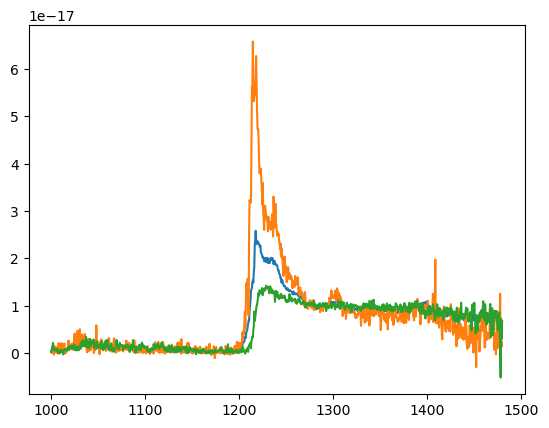

In [24]:
#Templates of galaxies from Banados et al., (2016)
compositehrspectra=Table.read('compositespectra.txt',format='ascii')
compositehrspectra.info()
composite_flux=compositehrspectra['FluxD']
composite_fluxhl=compositehrspectra['FluxD(hlya)']
composite_fluxll=compositehrspectra['FluxD(llya)']
composite_wave=compositehrspectra['Wave']
#Here we scale to our units
plt.plot(composite_wave,composite_flux*1e-17)
plt.plot(composite_wave,composite_fluxhl*1e-17)
plt.plot(composite_wave,composite_fluxll*1e-17)
composite_wave[0],composite_wave[-1]

/opt/anaconda3/envs/sculptor/lib/python3.10/site-packages/numpy/_core/fromnumeric.py:3858: RuntimeWarning: Mean of empty slice.
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/opt/anaconda3/envs/sculptor/lib/python3.10/site-packages/numpy/_core/_methods.py:145: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


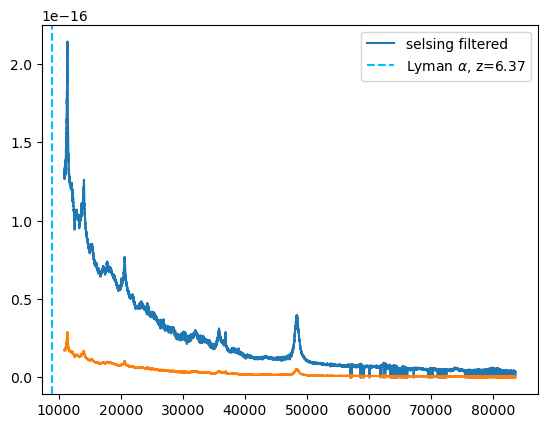

In [25]:
#Try the templates and data, not part of final analysis

#Join Composite Banados+Selsing et el., (2015) data
z=6.37 #This is the redshift of the galaxy
data = np.loadtxt('Selsing2015.dat', delimiter=' ')
wl=data[:,0]
weighted_mean=data[:,1]
error_of_weighted_mean=data[:,2] 

factor=4.7
maskcs=wl>1479.5 #Here to the last Banados wave 
selsingflux=weighted_mean[maskcs]

plt.plot((z+1)*wl[maskcs],1e-17*selsingflux,label='selsing filtered')

#Here we joined both templates doing an average of a small region of 100 angstroms to merge data
#Here we took the first template composite_flux or medial Lyalpha
#Average for comp and selsing
mask_totalc=(composite_wave>1300*(z+1))&(composite_wave<1400*(z+1)) 
mask_sel=(wl>1300*(z+1))&(wl<1400*(z+1)) 
av_qso_comp=np.mean(weighted_mean[mask_sel])
mask_totalc=(composite_wave>1300*(z+1))&(composite_wave<1400*(z+1)) 
av_data=np.mean(composite_flux[mask_totalc])
factorc=av_qso_comp/av_data
############ 

#Create table with our final data
tabc = astropy.table.Table()
tabc['WAVE']= np.append((z+1)*composite_wave,(z+1)*wl[maskcs])
tabc['FLUX']= np.append(composite_flux*1e-17*factorc/(z+1),1e-17*selsingflux/(z+1))


plt.plot(tabc['WAVE'],tabc['FLUX'])
plt.axvline(1215.67*(z+1), linestyle='--',label=r'Lyman $\alpha$, z=6.37',color='deepskyblue')
#plt.plot(composite_wave*(z+1),(composite_flux)*1e-17/(z+1))
plt.legend()
#plt.xlim(10000,13000)

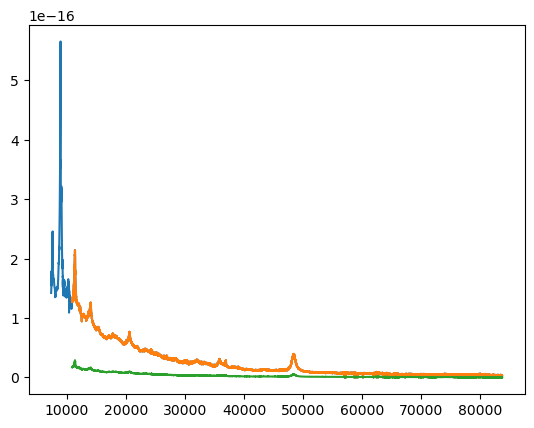

In [26]:
#We tried the other template high lyman
#Composite Banados HLyA+Selsing data
z=6.37
data = np.loadtxt('Selsing2015.dat', delimiter=' ')
wl=data[:,0]
weighted_mean=data[:,1]
error_of_weighted_mean=data[:,2]

#last wavelenght 1479.5
maskcs=wl>1479.5
selsingflux=weighted_mean[maskcs]
plt.plot((z+1)*wl,1e-17*weighted_mean)
plt.plot((z+1)*wl[maskcs],1e-17*selsingflux)


tabch = astropy.table.Table()
tabch['WAVE']= np.append((z+1)*composite_wave,(z+1)*wl[maskcs])
tabch['FLUX']= np.append((composite_fluxhl*1e-17*factorc)/(z+1),1e-17*selsingflux/(z+1))
plt.plot(tabch['WAVE'],tabch['FLUX'])

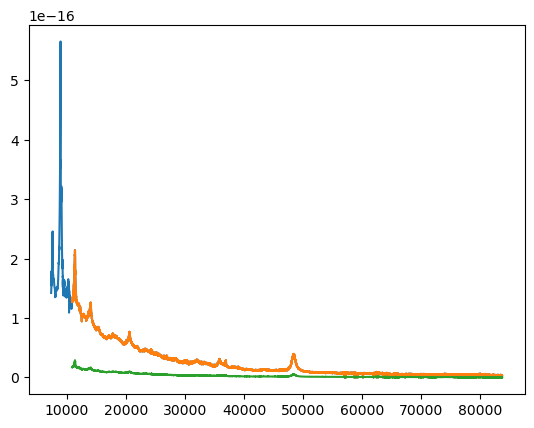

In [27]:
#Last template low lyman
#Composite Banados LLyA+Selsing data
z=6.37
data = np.loadtxt('Selsing2015.dat', delimiter=' ')
wl=data[:,0]
weighted_mean=data[:,1]
error_of_weighted_mean=data[:,2]

#last wavelenght 1479.5
maskcs=wl>1479.5
selsingflux=weighted_mean[maskcs]
plt.plot((z+1)*wl,1e-17*weighted_mean)
plt.plot((z+1)*wl[maskcs],1e-17*selsingflux)


tabcl = astropy.table.Table()
tabcl['WAVE']= np.append((z+1)*composite_wave,(z+1)*wl[maskcs])
tabcl['FLUX']= np.append((composite_fluxll*1e-17*factorc)/(z+1),1e-17*selsingflux/(z+1))
plt.plot(tabcl['WAVE'],tabcl['FLUX'])

For our analysis we used brown dwarf templates, for Burgasser & Elwain et al.,2015 .

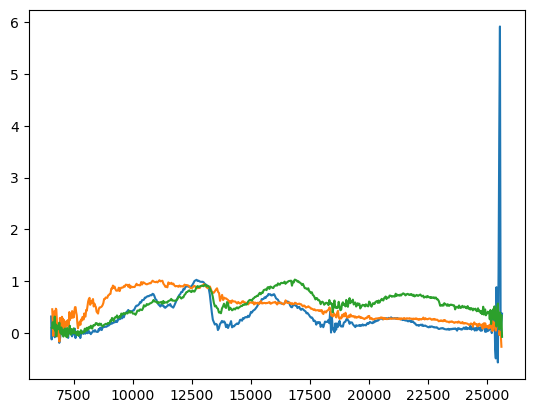

In [28]:
#Plots for the spectrum some BD
brownd_t=Table.read('2MASSJ11220826m351236320040312BUR06C',format='ascii')
brownd_t.columns
plt.plot(brownd_t['col1']*1e4,brownd_t['col2'])


brownd_m=Table.read('2MASSJ00013044p101014620030919BUR04B',format='ascii')
brownd_m.columns
plt.plot(brownd_m['col1']*1e4,brownd_m['col2'])

brownd_l=Table.read('2MASSIJ0103320p19353620030919CRU04A',format='ascii')
brownd_l.columns
plt.plot(brownd_l['col1']*1e4,brownd_l['col2'])

/var/folders/j7/7jycj8cn5115qrnj1rx7c8340005dg/T/ipykernel_24469/3751087124.py:34: RuntimeWarning: divide by zero encountered in divide
  ax1.plot(nspecoptA.dispersion[mask_opt],1e-17/(nspecoptA.fluxden_ivar[mask_opt])**2, 'grey')


(-5e-18, 4e-17)

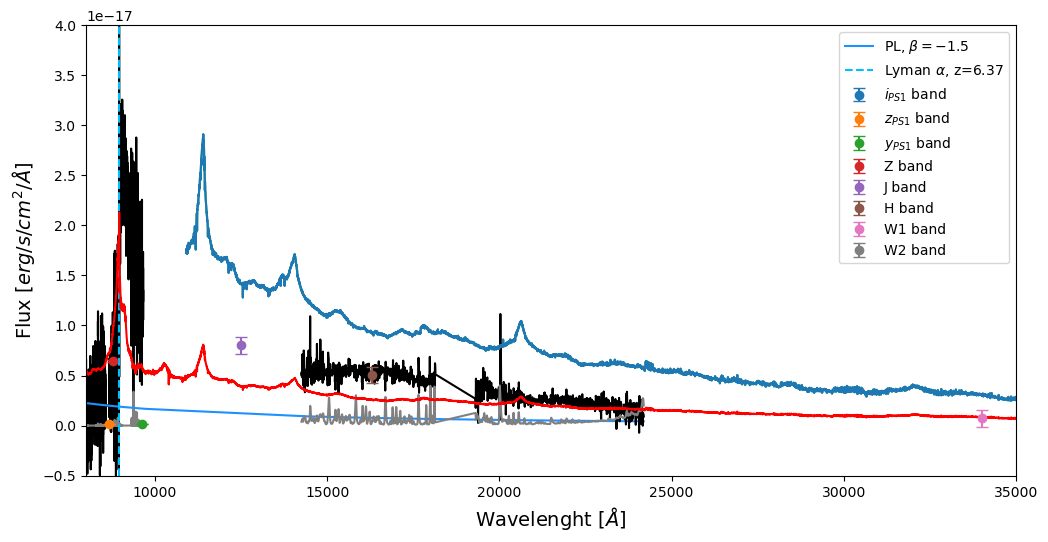

In [29]:
import matplotlib.gridspec as gridspec
import matplotlib.ticker as ticker
fig = plt.figure(figsize=(12, 8))

#BRown dwarfs
brownd_t=Table.read('2MASSJ11220826m351236320040312BUR06C',format='ascii')
brownd_t.columns


brownd_m=Table.read('2MASSJ00013044p101014620030919BUR04B',format='ascii')
brownd_m.columns


brownd_l=Table.read('2MASSIJ0103320p19353620030919CRU04A',format='ascii')
brownd_l.columns

#ax1.plot(brownd_t['col1']*1e4,brownd_t['col2']*1e-17,label='t')
#ax1.plot(brownd_m['col1']*1e4,brownd_m['col2']*1e-17,label='M')
#ax1.plot(brownd_l['col1']*1e4,brownd_l['col2']*1e-17,label='l')

##Plot
gs = gridspec.GridSpec(2, 1, height_ratios=[3, 1], hspace=0.05)
ax1 = fig.add_subplot(gs[0])


# mask_opt= (
#         ((nspecoptA.dispersion > 6000) & (nspecoptA.dispersion < 8664)) |
#         ((nspecoptA.dispersion > 8673) & (nspecoptA.dispersion < 9730))
     
# )

#Plotting data
ax1.plot(nspecoptA.dispersion[mask_opt], nspecoptA.fluxden[mask_opt]*1e-17, 'black')
ax1.plot(nspecoptA.dispersion[mask_opt],1e-17/(nspecoptA.fluxden_ivar[mask_opt])**2, 'grey')

#Fitting flamingos
#factorflamingos=6.1 #6
factorpl=6.1#6.1
# maskflapl=(nspecoptB.dispersion>16000)&(nspecoptB.dispersion<16400) 
# maskpl=(contmodel.spec.dispersion>16000)&(contmodel.spec.dispersion<16400) 
# avgplfla=np.mean(nspecoptB.fluxden[maskflapl])
# avgpl=np.mean(fit.specmodels[0].model_fluxden[maskpl]/factorpl)
#factorflamingos=1#avgplfla/avgpl

#Plotting PL
ax1.plot(contmodel.spec.dispersion,1e-17*fit.specmodels[0].model_fluxden/factorpl,color='dodgerblue',label=r'PL, $\beta=-1.5$')

#Plotting FLAMINGOS
ax1.plot(nspecoptB.dispersion, 1e-17*nspecoptB.fluxden, 'black')
ax1.plot(nspecoptB.dispersion, 1e-17/(nspecoptB.fluxden_err)**2, 'grey')

#Plotting different points
ax1.errorbar(x=7520, y=8.15e-20, yerr=2.5e-20, fmt='o', capsize=4,label=r'$i_{PS1}$ band')
ax1.errorbar(x=8660, y=1.67e-19, yerr=0.05e-19, fmt='o', capsize=4,label=r'$z_{PS1}$ band')
ax1.errorbar(x=9620, y=1.77e-19, yerr=0.1e-19, fmt='o', capsize=4,label=r'$y_{PS1}$ band')

ax1.errorbar(x=8780, y=6.47e-18, yerr=0.11e-18, fmt='o', capsize=4,label='Z band')
ax1.errorbar(x=12500, y=8.014e-18, yerr=0.85e-18, fmt='o', capsize=4,label='J band')
ax1.errorbar(x=16300, y=5.04e-18, yerr=0.8e-18, fmt='o', capsize=4,label='H band')


ax1.errorbar(x=34000, y=7.19e-19, yerr=0.85e-18, fmt='o', capsize=4,label='W1 band')
ax1.errorbar(x=46000, y=2.28e-19, yerr=0.8e-18, fmt='o', capsize=4,label='W2 band')

ax1.set_ylabel(r'Flux [$erg/s/cm^2/\AA$]',fontsize=14)
ax1.set_xlabel(r'Wavelenght [$\AA$]',fontsize=14)


#QSO template

mask_t= wl >1215.67 
factor=1#4.7
flux_QSO=1e-17*(weighted_mean)/((z+1)*factor)#1e-17*(weighted_mean[mask_t])/((z+1)*factor)
#ax1.plot((z+1)*(wl[mask_t]),flux_QSO,color='mediumslateblue',label='QSO template')
#ax1.plot((z+1)*(wl),flux_QSO,color='mediumslateblue',label='QSO template')


#Plotting Lya
ax1.axvline(1215.67*(z+1), linestyle='--',label=r'Lyman $\alpha$, z=6.37',color='deepskyblue')
plt.legend()


#Just plotting different quassar templates
ax1.plot(tabcl['WAVE'],tabcl['FLUX'],label='Low')
ax1.plot(tabc['WAVE'],tabc['FLUX'],label='Comp')
ax1.plot(tabch['WAVE'],tabch['FLUX'],label='High')

ax1.plot(wl*(1+z),(1e-17*weighted_mean/(1+z))/3.6,color='red')

ax1.set_xlim(8000,35000)
ax1.set_ylim(-0.5*1e-17, 4*1e-17)

#ax1.set_xscale('log')



In [31]:
#Final table/factor flamingos matches the J band. We used this data for the analysis of our galaxy.
#THis includes the wavelenght, our flux and the error on the flux
tabf = astropy.table.Table()
tabf['WAVELENGTH']= np.append(nspecoptA.dispersion,nspecoptB.dispersion)
tabf['FLUX']=np.append(nspecoptA.fluxden*1e-17,1e-17*(nspecoptB.fluxden))
tabf['ERR']= np.append(1e-17*(nspecoptA.fluxden_err)**2, 1e-17/(nspecoptB.fluxden_err)**2) 

tabf.write('spectra_gmos_fla_2_v2.txt', format='ascii', overwrite=True)

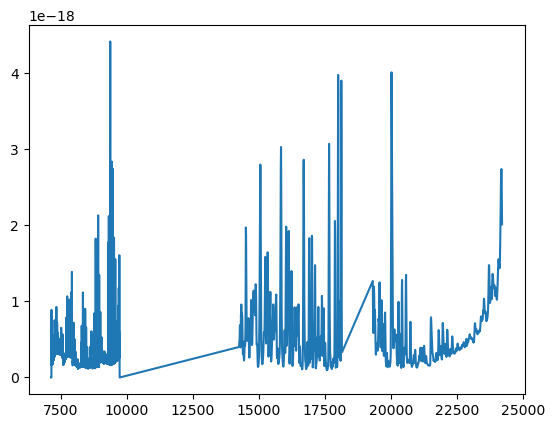

In [33]:
#Check if error vector looks ok
plt.plot(tabf['WAVELENGTH'],tabf['ERR'])

(7000.0, 25000.0)

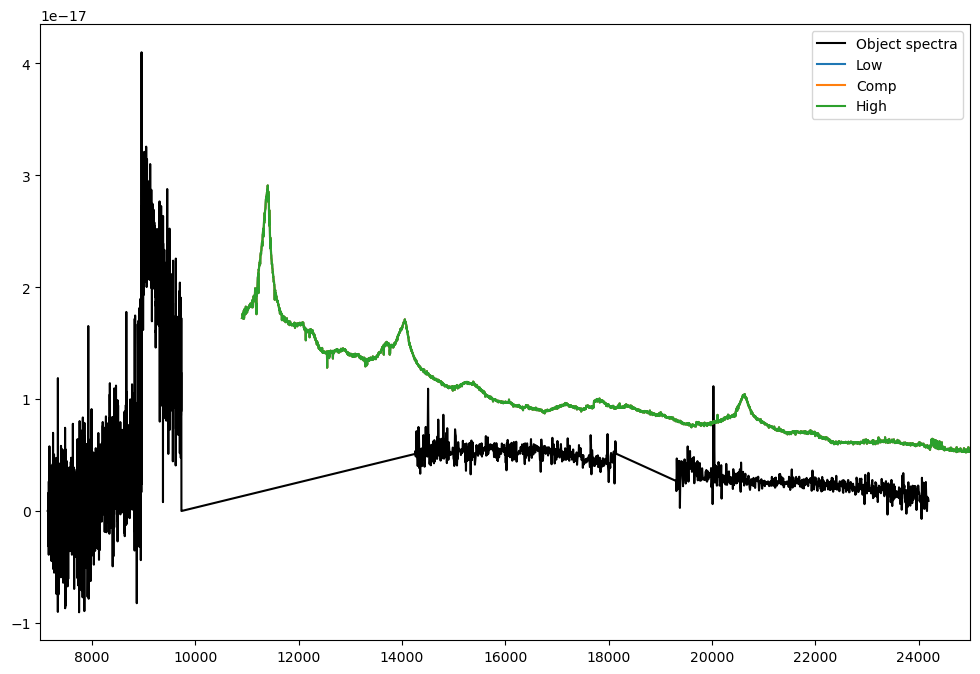

In [34]:
fig = plt.figure(figsize=(12, 8))


#Different quassar templates
plt.plot(tabf['WAVELENGTH'],tabf['FLUX'],label='Object spectra',color='black')
plt.plot(tabcl['WAVE'],tabcl['FLUX'],label='Low')
plt.plot(tabc['WAVE'],tabc['FLUX'],label='Comp')
plt.plot(tabch['WAVE'],tabch['FLUX'],label='High')
plt.legend()
plt.xlim(7000,25000)

## From here only brown dwarfs

Some plots to observe the general behaviour on brown dwarfs with the data of the galaxy to find the best model. 

In [35]:
# from itertools import zip_longest
# fig = plt.figure(figsize=(12, 8))


# tabf = astropy.table.Table()
# tabf['WAVELENGTH']= np.append(nspecoptA.dispersion[mask_opt],spec.dispersion[mask])
# tabf['FLUX']= np.append(filtered_arr*1e-17,1e-17*filtered_arr2/6)
# tabf['ERR']= np.append(1e-17/(filtered_arr_err)**2, 1e-17*filtered_arr_err2/6) 


# mask_bd=(wl>1215.67)#8959.4879# &(wl*(z+1)<9900)|(wl*(z+1)>14000) & (wl*(z+1)<18300)|(wl*(z+1)>19000) &   (wl*(z+1)<24900)
# a=tabf['FLUX']
# b=1e-17*(weighted_mean[mask_bd])/((z+1)*factor)
# #resultado =  [x - y for x, y in zip_longest(a, b, fillvalue=0)]
# min_len = min(len(a), len(b))
# resultado = a[:min_len] - b[:min_len]

# plt.plot(tabf['WAVELENGTH'],a,label='Object spectra')
# plt.plot(tabf['WAVELENGTH'],resultado,label='Subtraction Object-QSO') #add mask_bd
# plt.plot((z+1)*(wl[mask_t]),flux_QSO[mask_t],label='QSO template')
# plt.plot(brownd_t['col1']*1e4,brownd_t['col2']*1e-17/1.2,label='BD t')
# plt.plot(brownd_m['col1']*1e4,brownd_m['col2']*1e-17/1.1,label='BD M')
# plt.plot(brownd_l['col1']*1e4,brownd_l['col2']*1e-17/1.2,label='BD l')
# plt.errorbar(x=34000, y=7.19e-19, yerr=0.85e-18, fmt='o', capsize=4,label='W1 band')
# plt.errorbar(x=12500, y=8.014e-18, yerr=0.85e-18, fmt='o', capsize=4,label='J band')
# plt.errorbar(x=16300, y=5.04e-18, yerr=0.8e-18, fmt='o', capsize=4,label='H band')
# #PLOT OTHER bd m STARS

# brownd_m2=Table.read('2MASSJ00115060m152345020030918BUR04B',format='ascii')
# brownd_m2.columns
# #plt.plot(brownd_m2['col1']*1e4,brownd_m2['col2']*1e-17/1.15,label='BD M2',color='magenta')


# plt.xlim(7000,25000)
# plt.legend()

In [36]:
# #Only M
# fig = plt.figure(figsize=(12, 8))


# tabf = astropy.table.Table()
# tabf['WAVELENGTH']= np.append(nspecoptA.dispersion[mask_opt],spec.dispersion[mask])
# tabf['FLUX']= np.append(filtered_arr*1e-17,1e-17*filtered_arr2/6)
# tabf['ERR']= np.append(1e-17/(filtered_arr_err)**2, 1e-17*filtered_arr_err2/6) 


# mask_bd=(wl>1215.67)# &(wl*(z+1)<9900)|(wl*(z+1)>14000) & (wl*(z+1)<18300)|(wl*(z+1)>19000) &   (wl*(z+1)<24900)
# a=tabf['FLUX']
# b=flux_QSO[mask_bd]
# #resultado =  [x - y for x, y in zip_longest(a, b, fillvalue=0)]
# min_len = min(len(a), len(b))
# resultado = a[:min_len] - b[:min_len]

# #plt.plot(tabf['WAVELENGTH'],a,label='Object spectra')
# plt.plot(tabf['WAVELENGTH'],resultado,label='Subtraction Object-QSO')
# #plt.plot((z+1)*(wl[mask_t]),flux_QSO,label='QSO template')



# plt.errorbar(x=16300, y=5.04e-18, yerr=0.8e-18, fmt='o', capsize=4,label='H band')
# plt.errorbar(x=12500, y=8.014e-18, yerr=0.85e-18, fmt='o', capsize=4,label='J band')

# #PLOT OTHER bd m STARS

# factorm=1.22

# plt.plot(brownd_m['col1']*1e4,brownd_m['col2']*1e-17/factorm,label='BD M')
# brownd_t2=Table.read('2MASSJ00115060m152345020030918BUR04B',format='ascii')
# brownd_m2.columns
# plt.plot(brownd_m2['col1']*1e4,brownd_m2['col2']*1e-17/factorm,label='BD M2')

# brownd_m3=Table.read('2MASSJ1237p302820080618SHE09A',format='ascii')
# brownd_m3.columns
# plt.plot(brownd_m3['col1']*1e4,brownd_m3['col2']*1e-17/factorm,label='BD M3')
# plt.xscale('log')

# plt.xlim(7000,25000)
# plt.legend()

In [37]:
# #Only t
# from itertools import zip_longest
# fig = plt.figure(figsize=(12, 8))


# tabf = astropy.table.Table()
# tabf['WAVELENGTH']= np.append(nspecoptA.dispersion[mask_opt],spec.dispersion[mask])
# tabf['FLUX']= np.append(filtered_arr*1e-17,1e-17*filtered_arr2/6)
# tabf['ERR']= np.append(1e-17/(filtered_arr_err)**2, 1e-17*filtered_arr_err2/6) 


# mask_bd=(wl>1215.67)# &(wl*(z+1)<9900)|(wl*(z+1)>14000) & (wl*(z+1)<18300)|(wl*(z+1)>19000) &   (wl*(z+1)<24900)
# a=tabf['FLUX']
# b=flux_QSO[mask_bd]
# #resultado =  [x - y for x, y in zip_longest(a, b, fillvalue=0)]
# min_len = min(len(a), len(b))
# resultado = a[:min_len] - b[:min_len]

# #plt.plot(tabf['WAVELENGTH'],a,label='Object spectra')
# plt.plot(tabf['WAVELENGTH'],resultado,label='Subtraction Object-QSO')
# plt.plot((z+1)*(wl[mask_t]),flux_QSO[mask_t],label='QSO template')

# #plt.plot(brownd_m['col1']*1e4,brownd_m['col2']*1e-17/1.1,label='BD M')
# #plt.plot(brownd_l['col1']*1e4,brownd_l['col2']*1e-17/1.2,label='BD l')
# plt.errorbar(x=12500, y=8.014e-18, yerr=0.85e-18, fmt='o', capsize=4,label='J band')
# plt.errorbar(x=16300, y=5.04e-18, yerr=0.8e-18, fmt='o', capsize=4,label='H band')

# #PLOT OTHER bd m STARS
# factort=1.2
# plt.plot(brownd_t['col1']*1e4,brownd_t['col2']*1e-17/factort,label='BD T')
# brownd_t2=Table.read('2MASSJ13243553p635828120060411LOO07A',format='ascii')
# plt.plot(brownd_t2['col1']*1e4,brownd_t2['col2']*1e-17/factort,label='BD T2')

# brownd_t3=Table.read('HD3651B20060903BUR07B',format='ascii')
# plt.plot(brownd_t3['col1']*1e4,brownd_t3['col2']*1e-17/factort,label='BD T3')
# plt.xscale('log')

# plt.xlim(7000,25000)
# plt.legend()

In [38]:
# #Only l
# from itertools import zip_longest
# fig = plt.figure(figsize=(12, 8))


# tabf = astropy.table.Table()
# tabf['WAVELENGTH']= np.append(nspecoptA.dispersion[mask_opt],spec.dispersion[mask])
# tabf['FLUX']= np.append(filtered_arr*1e-17,1e-17*filtered_arr2/6)
# tabf['ERR']= np.append(1e-17/(filtered_arr_err)**2, 1e-17*filtered_arr_err2/6) 


# mask_bd=(tabf['WAVELENGTH']>8959.4879)# &(wl*(z+1)<9900)|(wl*(z+1)>14000) & (wl*(z+1)<18300)|(wl*(z+1)>19000) &   (wl*(z+1)<24900)
# a=tabf['FLUX']
# b=flux_QSO[wl>1215.670*(z+1)]

# #resultado =  [x - y for x, y in zip_longest(a, b, fillvalue=0)]
# min_len = min(len(a), len(b))
# resultado = a[:min_len] - b[:min_len]

# #plt.plot(tabf['WAVELENGTH'],a,label='Object spectra')
# plt.plot(tabf['WAVELENGTH'],resultado,label='Subtraction Object-QSO')
# plt.plot((z+1)*(wl[mask_t]),flux_QSO[mask_t],label='QSO template')


# plt.errorbar(x=12500, y=8.014e-18, yerr=0.85e-18, fmt='o', capsize=4,label='J band')
# plt.errorbar(x=16300, y=5.04e-18, yerr=0.8e-18, fmt='o', capsize=4,label='H band')

# #PLOT OTHER bd L STARS
# factorl=1.7
# plt.plot(brownd_l['col1']*1e4,brownd_l['col2']*1e-17/factorl,label='BD L')
# brownd_l2=Table.read('2MASSJ01414839m160119620051018KIR10A',format='ascii')
# plt.plot(brownd_l2['col1']*1e4,brownd_l2['col2']*1e-17/factorl,label='BD L2')

# brownd_l3=Table.read('2MASSJ05161597m333204620041107BUR10A',format='ascii')
# plt.plot(brownd_l3['col1']*1e4,brownd_l3['col2']*1e-17/factorl,label='BD L3')


# plt.xlim(7000,30000)
# plt.legend()
# plt.xscale('log')

In [39]:

# fig = plt.figure(figsize=(12, 8))
# #Average
# mask_a=(tabf['WAVELENGTH']>15000)&(tabf['WAVELENGTH']<15400) 
# mask_b=(15000<brownd_l3['col1']*1e4)&(15400>brownd_l3['col1']*1e4)

# av_qso=np.mean(resultado[mask_a])
# av_bd=np.mean(1e-17*brownd_l3['col2'][mask_b])
# factorbdl=av_qso/av_bd
# plt.plot(brownd_l3['col1']*1e4,brownd_l3['col2']*1e-17*factorbdl,label='Normalized BD L')



# plt.plot(tabf['WAVELENGTH'],resultado,label='Subtraction Object-QSO')
# #plt.plot((z+1)*(wl[mask_t]),flux_QSO,label='QSO template')


# plt.errorbar(x=12500, y=8.014e-18, yerr=0.85e-18, fmt='o', capsize=4,label='J band')
# plt.errorbar(x=16300, y=5.04e-18, yerr=0.8e-18, fmt='o', capsize=4,label='H band')

# plt.xlim(7000,30000)
# plt.legend()

In [40]:

# fig = plt.figure(figsize=(12, 8))
# #Average
# mask_a=(tabf['WAVELENGTH']>15000)&(tabf['WAVELENGTH']<15400) 
# mask_bt=(15000<brownd_t2['col1']*1e4)&(15400>brownd_t2['col1']*1e4)

# av_qso=np.mean(resultado[mask_a])
# av_bdt=np.mean(1e-17*brownd_t2['col2'][mask_bt])
# factorbdt=av_qso/av_bdt
# plt.plot(brownd_t2['col1']*1e4,brownd_t2['col2']*1e-17*factorbdt,label='Normalized BD T')



# plt.plot(tabf['WAVELENGTH'],resultado,label='Subtraction Object-QSO')



# plt.errorbar(x=12500, y=8.014e-18, yerr=0.85e-18, fmt='o', capsize=4,label='J band')
# plt.errorbar(x=16300, y=5.04e-18, yerr=0.8e-18, fmt='o', capsize=4,label='H band')

# plt.xlim(7000,30000)
# plt.legend()

In [41]:

# fig = plt.figure(figsize=(12, 8))
# #Average
# mask_a=(tabf['WAVELENGTH']>16000)&(tabf['WAVELENGTH']<16400) 
# mask_bt=(15000<brownd_m3['col1']*1e4)&(15400>brownd_m3['col1']*1e4)

# av_qso=np.mean(resultado[mask_a])
# av_bdm=np.mean(1e-17*brownd_m3['col2'][mask_bt])
# factorbdm=av_qso/av_bdm
# plt.plot(brownd_m3['col1']*1e4,brownd_m3['col2']*1e-17*factorbdm,label='Normalized BD M')



# plt.plot(tabf['WAVELENGTH'],resultado,label='Subtraction Object-QSO')



# plt.errorbar(x=12500, y=8.014e-18, yerr=0.85e-18, fmt='o', capsize=4,label='J band')
# plt.errorbar(x=16300, y=5.04e-18, yerr=0.8e-18, fmt='o', capsize=4,label='H band')

# plt.xlim(7000,24500)
# plt.legend()

In [42]:
# #here substraction with High+Selsing QSO template $#%*&^(*&(*&((&*(*&*(
# #plt.plot(tabc['WAVE'],tabc['FLUX'],label='Comp')
# #Only M
# fig = plt.figure(figsize=(12, 8))


# tabf = astropy.table.Table()
# tabf['WAVELENGTH']= np.append(nspecoptA.dispersion[mask_opt],spec.dispersion[mask])
# tabf['FLUX']= np.append(filtered_arr*1e-17,1e-17*filtered_arr2/6)
# tabf['ERR']= np.append(1e-17/(filtered_arr_err)**2, 1e-17*filtered_arr_err2/6) 



# tabch = astropy.table.Table()
# tabch['WAVE']= np.append((z+1)*composite_wave,(z+1)*wl[maskcs])
# tabch['FLUX']= np.append((composite_fluxhl*1e-17*factorc)/(z+1),1e-17*selsingflux/(z+1))


# mask_bd=(tabf['WAVELENGTH']>1215.6*(z+1))# &(wl*(z+1)<9900)|(wl*(z+1)>14000) & (wl*(z+1)<18300)|(wl*(z+1)>19000) &   (wl*(z+1)<24900)
# a=tabf['FLUX'][mask_bd] #original flux
# b=tabch['FLUX'][tabch['WAVE']>1215.6*(z+1)] #high Lyman A
# c=tabc['FLUX']#[tabc['WAVE']>1215.670*(z+1)] #commp Lyman A
# d=tabcl['FLUX']#[tabcl['WAVE']>1215.670*(z+1)]  #low Lyman A
# #resultado =  [x - y for x, y in zip_longest(a, b, fillvalue=0)]
# min_len = min(len(a), len(b))
# resultado = a[:min_len] - b[:min_len]
# min_len2 = min(len(a), len(c))
# min_len3 = min(len(a), len(d))
# resultado2 = a[:min_len2] - c[:min_len2]
# resultado3 = a[:min_len3] - d[:min_len3]
# #plt.plot(tabf['WAVELENGTH'],resultado3,label='Subtraction Object-QSO Low Lya')
# plt.plot(tabf['WAVELENGTH'][mask_bd],resultado,label='Subtraction Object-QSO High Lya')
# #plt.plot(tabf['WAVELENGTH'],resultado2,label='Subtraction Object-QSO Comp Lya')


# plt.plot(tabf['WAVELENGTH'],tabf['FLUX'],label='Original')


# plt.errorbar(x=16300, y=5.04e-18, yerr=0.8e-18, fmt='o', capsize=4,label='H band')
# plt.errorbar(x=12500, y=8.014e-18, yerr=0.85e-18, fmt='o', capsize=4,label='J band')

# #PLOT Mstar


# brownd_m3=Table.read('2MASSJ1237p302820080618SHE09A',format='ascii')
# brownd_m3.columns

# plt.xscale('log')



# #Average
# mask_a=(tabf['WAVELENGTH'][mask_bd]>16000)&(tabf['WAVELENGTH'][mask_bd]<16400) 
# mask_bt=(16000<brownd_m3['col1']*1e4)&(16400>brownd_m3['col1']*1e4)

# av_qso=np.mean(resultado[mask_a])
# av_bdm=np.mean(1e-17*brownd_m3['col2'][mask_bt])
# factorbdm=av_qso/av_bdm
# plt.plot(brownd_m3['col1']*1e4,brownd_m3['col2']*1e-17*factorbdm,label='Normalized BD M')


# plt.xlim(7000,24500)
# plt.legend()

